In [0]:
# Week 2:  Bigram Frequencies and Mutual Information
# This file has small examples that are meant to be run individually
# in the Python interpreter or jupyter notebook cells

In [0]:
import pandas as pd
import io

In [0]:
# Getting started to process a text example
import nltk
from nltk import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
# get the text of the lyrics, tokenize it,
#   and reduce the tokens to lowercase.
#file0 = nltk.corpus.gutenberg.fileids( ) [3]
#hollytext = nltk.corpus.gutenberg.raw(file0)
f = open('hollyedit.txt')
raw = f.read()
hollytokens = nltk.word_tokenize(raw) 
hollywords = [w.lower( ) for w in hollytokens] 
# show some of thv words
print(len(hollywords))
print(hollywords[ :110])

9588
['``', 'a', 'memory', 'falls', 'down', 'from', 'where', 'it', 'was', 'with', 'this', 'confession', 'i', 'beg', 'for', 'more', 'i', 'never', 'mean', 'to', 'and', 'it', "'s", 'been', 'awhile', 'since', 'i', 'found', 'meaning', 'in', 'these', 'desires', 'i', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'i', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'a', 'kid', 'fire', 'and', 'blankets', ',', 'a', 'cheap', 'parade', 'of', 'guilty', 'pleasures', ',', 'i', 'take', 'the', 'stage', 'but', 'nothing', 'feels', 'good', 'if', 'it', 'ai', "n't", 'true', 'it', "'s", 'like', 'trying', 'to', 'cry', 'for', 'someone', 'you', 'never', 'knew', 'i', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'i', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'kid', 'i', 'love', 'you', 'with']


In [0]:
#use NLTK's stemmers (section 3.6 in NLTK book)
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [0]:
#compare Porter stemmers on the tokens
hollyPstem = [porter.stem(t) for t in hollytokens]
print(hollyPstem[:120])

['``', 'A', 'memori', 'fall', 'down', 'from', 'where', 'it', 'wa', 'with', 'thi', 'confess', 'I', 'beg', 'for', 'more', 'I', 'never', 'mean', 'to', 'and', 'it', "'s", 'been', 'awhil', 'sinc', 'I', 'found', 'mean', 'in', 'these', 'desir', 'I', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'thi', 'I', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'a', 'kid', 'fire', 'and', 'blanket', ',', 'a', 'cheap', 'parad', 'Of', 'guilti', 'pleasur', ',', 'I', 'take', 'the', 'stage', 'but', 'noth', 'feel', 'good', 'if', 'it', 'ai', "n't", 'true', 'It', "'s", 'like', 'tri', 'to', 'cri', 'for', 'someon', 'you', 'never', 'knew', 'I', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'thi', 'I', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'kid', 'I', 'love', 'you', 'with', 'more', 'tear', 'than', 'ani', 'pain', 'could', 'ever', 'bring', 'me', 'I']


In [0]:
#NLTK has a lemmatizer that uses WordNet as a dictionary
wnl = nltk.WordNetLemmatizer()
HollyLemma = [wnl.lemmatize(t) for t in hollytokens]
print(HollyLemma[:200])

['``', 'A', 'memory', 'fall', 'down', 'from', 'where', 'it', 'wa', 'With', 'this', 'confession', 'I', 'beg', 'for', 'more', 'I', 'never', 'mean', 'to', 'and', 'it', "'s", 'been', 'awhile', 'Since', 'I', 'found', 'meaning', 'in', 'these', 'desire', 'I', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'I', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'a', 'kid', 'Fire', 'and', 'blanket', ',', 'a', 'cheap', 'parade', 'Of', 'guilty', 'pleasure', ',', 'I', 'take', 'the', 'stage', 'But', 'nothing', 'feel', 'good', 'if', 'it', 'ai', "n't", 'true', 'It', "'s", 'like', 'trying', 'to', 'cry', 'for', 'someone', 'you', 'never', 'knew', 'I', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'I', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'kid', 'I', 'love', 'you', 'with', 'more', 'tear', 'than', 'any', 'pain', 'could', 'ever', 'bring', 'me', 'I', 'fight', 'it', 'most', 'everyday', 'I', 'hurt', 'you', 'with', 'more', 'truth', 'than', 'your', 'own', 'eye'

In [0]:
# Creating a frequency distribution of words
ndist = FreqDist(hollywords)

In [0]:
# print the top 50 tokens by frequency
nitems = ndist.most_common(50)
for item in nitems:
    print (item[0], '\t', item[1])

i 	 572
you 	 408
the 	 317
, 	 251
to 	 199
a 	 192
and 	 160
me 	 151
in 	 118
n't 	 118
's 	 111
it 	 109
that 	 105
my 	 104
do 	 95
like 	 92
of 	 89
on 	 88
with 	 79
your 	 79
love 	 75
all 	 75
for 	 64
but 	 62
her 	 62
we 	 61
this 	 59
'm 	 59
'' 	 57
know 	 55
could 	 55
is 	 55
never 	 46
have 	 46
if 	 45
when 	 44
let 	 44
are 	 44
there 	 43
've 	 43
be 	 43
was 	 41
go 	 41
're 	 39
he 	 39
up 	 38
why 	 38
heart 	 37
out 	 37
'll 	 36


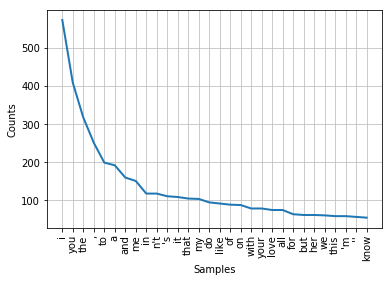

In [0]:
ndist.plot(30,cumulative=False)

In [0]:
print(hollywords[:160])
#print(hollywords2lowercase[:160])

['``', 'a', 'memory', 'falls', 'down', 'from', 'where', 'it', 'was', 'with', 'this', 'confession', 'i', 'beg', 'for', 'more', 'i', 'never', 'mean', 'to', 'and', 'it', "'s", 'been', 'awhile', 'since', 'i', 'found', 'meaning', 'in', 'these', 'desires', 'i', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'i', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'a', 'kid', 'fire', 'and', 'blankets', ',', 'a', 'cheap', 'parade', 'of', 'guilty', 'pleasures', ',', 'i', 'take', 'the', 'stage', 'but', 'nothing', 'feels', 'good', 'if', 'it', 'ai', "n't", 'true', 'it', "'s", 'like', 'trying', 'to', 'cry', 'for', 'someone', 'you', 'never', 'knew', 'i', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'i', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'kid', 'i', 'love', 'you', 'with', 'more', 'tears', 'than', 'any', 'pain', 'could', 'ever', 'bring', 'me', 'i', 'fight', 'it', 'most', 'everyday', 'i', 'hurt', 'you', 'with', 'more', 'truth', 'than', 'your', 'own'

In [0]:
# this function takes a string and a list of words as parameters.
#   It will return all the words in the list that contain the string as a substring
def searchstring (substring, wordlist):
    # initialize the result
    result = [ ]
    #  loop over all the words
    for word in wordlist:
        # test each word if it contains the substring
        if substring in word:
            # add it to the result
            result.append(word)
    return result

In [0]:
searchstring('z', hollywords)

['memorized', 'realize', 'crazy', 'crazy', 'cuz', 'criticize', 'philosophize']

In [0]:
##  Regular Expression to match non-alphabetic characters
import re

In [0]:
# this regular expression pattern matches any word that contains all non-alphabetical
#   lower-case characters [^a-z]+
# the beginning ^ and ending $ require the match to begin and end on a word boundary 
pattern = re.compile('^[^a-z]+$')

In [0]:
nonAlphaMatch = pattern.match('**')
#  if it matched, print a message
if nonAlphaMatch: print ('matched non-alphabetical')

matched non-alphabetical


In [0]:
# function that takes a word and returns true if it consists only
#   of non-alphabetic characters  (assumes import re)
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [0]:
# apply the function to hollywords
alphahollywords = [w for w in hollywords if not alpha_filter(w)]
print(alphahollywords[:100])
print(len(alphahollywords))

['a', 'memory', 'falls', 'down', 'from', 'where', 'it', 'was', 'with', 'this', 'confession', 'i', 'beg', 'for', 'more', 'i', 'never', 'mean', 'to', 'and', 'it', "'s", 'been', 'awhile', 'since', 'i', 'found', 'meaning', 'in', 'these', 'desires', 'i', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'i', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'a', 'kid', 'fire', 'and', 'blankets', 'a', 'cheap', 'parade', 'of', 'guilty', 'pleasures', 'i', 'take', 'the', 'stage', 'but', 'nothing', 'feels', 'good', 'if', 'it', 'ai', "n't", 'true', 'it', "'s", 'like', 'trying', 'to', 'cry', 'for', 'someone', 'you', 'never', 'knew', 'i', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'i', 'know', 'it', "'s", 'wrong', 'to']
9171


In [0]:
# get a list of stopwords from nltk
nltkstopwords = nltk.corpus.stopwords.words('english')
print(len(nltkstopwords))
print(nltkstopwords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [0]:
# check tokenization in hollywords
print(hollywords[:100])
print(hollywords[15300:15310])

['``', 'a', 'memory', 'falls', 'down', 'from', 'where', 'it', 'was', 'with', 'this', 'confession', 'i', 'beg', 'for', 'more', 'i', 'never', 'mean', 'to', 'and', 'it', "'s", 'been', 'awhile', 'since', 'i', 'found', 'meaning', 'in', 'these', 'desires', 'i', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'i', 'know', 'it', "'s", 'wrong', 'to', 'lie', 'like', 'a', 'kid', 'fire', 'and', 'blankets', ',', 'a', 'cheap', 'parade', 'of', 'guilty', 'pleasures', ',', 'i', 'take', 'the', 'stage', 'but', 'nothing', 'feels', 'good', 'if', 'it', 'ai', "n't", 'true', 'it', "'s", 'like', 'trying', 'to', 'cry', 'for', 'someone', 'you', 'never', 'knew', 'i', 'know', 'it', "'s", 'wrong', 'to', 'hurt', 'you', 'like', 'this', 'i', 'know', 'it']
[]


In [0]:
morestopwords = ['holly','williams','could','would','might','must','need','sha','wo','y',"'s","'d","'ll","'t","'m","'re","'ve", "n't", 'repeat','chorus','verse']

In [0]:
stopwords = nltkstopwords + morestopwords
print(len(stopwords))
print(stopwords)

200
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [0]:
stoppedhollywords = [w for w in alphahollywords if not w in stopwords]
print(len(stoppedhollywords))

3934


In [0]:
# use this list for a better frequency distribution
hollydist = FreqDist(stoppedhollywords)
hollyitems = hollydist.most_common(50)
for item in hollyitems:
  print(item)

('like', 92)
('love', 75)
('know', 55)
('never', 46)
('let', 44)
('go', 41)
('heart', 37)
('one', 35)
('night', 32)
('see', 29)
('everything', 27)
('still', 26)
('ever', 22)
('give', 22)
('man', 22)
('oh', 22)
('waiting', 22)
('day', 21)
('ca', 20)
('take', 19)
('young', 19)
('ai', 18)
('want', 18)
('baby', 18)
('away', 18)
('mama', 18)
('trying', 17)
('every', 17)
('got', 17)
('come', 17)
('well', 17)
('home', 17)
('without', 17)
('june', 17)
('used', 16)
('end', 16)
('believe', 16)
('yeah', 16)
('blue', 16)
('say', 16)
('nothing', 15)
('maybe', 15)
('hands', 15)
('made', 15)
('lie', 14)
('knew', 14)
('way', 14)
('always', 14)
('boy', 14)
('little', 14)


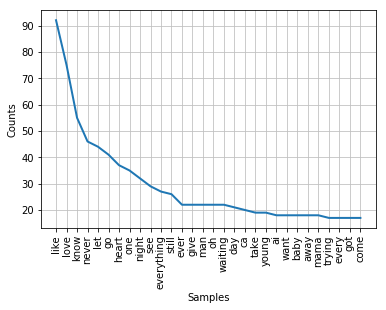

In [0]:
hollydist.plot(30,cumulative=False)

In [0]:
# Bigrams and Bigram frequency distribution
hollybigrams = list(nltk.bigrams(hollywords))
print(hollywords[:21])
print(hollybigrams[:20])

['``', 'a', 'memory', 'falls', 'down', 'from', 'where', 'it', 'was', 'with', 'this', 'confession', 'i', 'beg', 'for', 'more', 'i', 'never', 'mean', 'to', 'and']
[('``', 'a'), ('a', 'memory'), ('memory', 'falls'), ('falls', 'down'), ('down', 'from'), ('from', 'where'), ('where', 'it'), ('it', 'was'), ('was', 'with'), ('with', 'this'), ('this', 'confession'), ('confession', 'i'), ('i', 'beg'), ('beg', 'for'), ('for', 'more'), ('more', 'i'), ('i', 'never'), ('never', 'mean'), ('mean', 'to'), ('to', 'and')]


In [0]:
# setup for bigrams and bigram measures
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [0]:
# create the bigram finder and score the bigrams by frequency
# BIGRAMS MUST BE APPLIED TO COMPLETE WORD LIST WITHOUT REMOVED STOP WORDS -- LOWER CASE OK
finder = BigramCollocationFinder.from_words(hollywords)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [0]:
# scored is a list of bigram pairs with their score
print(type(scored))
first = scored[0]
print(type(first))
print(first)

<class 'list'>
<class 'tuple'>
(('do', "n't"), 0.0069879015435961615)


In [0]:
# scores are sorted in decreasing frequency
for bscore in scored[:50]:
    print (bscore)

(('do', "n't"), 0.0069879015435961615)
(('i', "'m"), 0.006153525239883187)
(('and', 'i'), 0.00458906967042136)
(('it', "'s"), 0.004276178556528994)
(('in', 'the'), 0.004067584480600751)
(('i', 'do'), 0.0037546933667083854)
(('i', 'could'), 0.0031289111389236545)
(('on', 'the'), 0.0031289111389236545)
(('but', 'i'), 0.0027117229870671673)
(('you', "'re"), 0.0027117229870671673)
(('i', 'love'), 0.0026074259491030453)
(('are', 'you'), 0.0025031289111389237)
(('i', 'know'), 0.0025031289111389237)
(('me', 'i'), 0.0025031289111389237)
(('why', 'are'), 0.0025031289111389237)
(('i', "'d"), 0.0023988318731748017)
(('i', "'ll"), 0.0023988318731748017)
(('i', "'ve"), 0.0023988318731748017)
(('let', 'her'), 0.00229453483521068)
(('do', 'you'), 0.002190237797246558)
(('ca', "n't"), 0.0020859407592824365)
(('i', 'was'), 0.0020859407592824365)
(('if', 'you'), 0.0020859407592824365)
(('like', 'the'), 0.0020859407592824365)
(('that', 'i'), 0.0020859407592824365)
(('when', 'i'), 0.0020859407592824365)
(

In [0]:
# apply a filter to remove non-alphabetical tokens from the holly bigram finder
finder.apply_word_filter(alpha_filter)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:50]:
    print (bscore)

(('do', "n't"), 0.0069879015435961615)
(('i', "'m"), 0.006153525239883187)
(('and', 'i'), 0.00458906967042136)
(('it', "'s"), 0.004276178556528994)
(('in', 'the'), 0.004067584480600751)
(('i', 'do'), 0.0037546933667083854)
(('i', 'could'), 0.0031289111389236545)
(('on', 'the'), 0.0031289111389236545)
(('but', 'i'), 0.0027117229870671673)
(('you', "'re"), 0.0027117229870671673)
(('i', 'love'), 0.0026074259491030453)
(('are', 'you'), 0.0025031289111389237)
(('i', 'know'), 0.0025031289111389237)
(('me', 'i'), 0.0025031289111389237)
(('why', 'are'), 0.0025031289111389237)
(('i', "'d"), 0.0023988318731748017)
(('i', "'ll"), 0.0023988318731748017)
(('i', "'ve"), 0.0023988318731748017)
(('let', 'her'), 0.00229453483521068)
(('do', 'you'), 0.002190237797246558)
(('ca', "n't"), 0.0020859407592824365)
(('i', 'was'), 0.0020859407592824365)
(('if', 'you'), 0.0020859407592824365)
(('like', 'the'), 0.0020859407592824365)
(('that', 'i'), 0.0020859407592824365)
(('when', 'i'), 0.0020859407592824365)
(

In [0]:
# apply a filter to remove stop words
# lambda is a function definition 'on the fly'
finder.apply_word_filter(lambda w: w in stopwords)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:50]:
    print (bscore)

(('gon', 'na'), 0.0007300792657488527)
(('runs', 'dry'), 0.0006257822277847309)
(('woman', 'like'), 0.0006257822277847309)
(('go', 'let'), 0.0005214851898206091)
(('good', 'man'), 0.0005214851898206091)
(('heart', 'blue'), 0.0005214851898206091)
(('life', 'like'), 0.0005214851898206091)
(('rodeo', 'road'), 0.0005214851898206091)
(('beat', 'til'), 0.00041718815185648727)
(('break', 'free'), 0.00041718815185648727)
(('day', 'without'), 0.00041718815185648727)
(('every', 'night'), 0.00041718815185648727)
(('finally', 'found'), 0.00041718815185648727)
(('gone', 'away'), 0.00041718815185648727)
(('let', 'go'), 0.00041718815185648727)
(('missing', 'home'), 0.00041718815185648727)
(('still', 'trying'), 0.00041718815185648727)
(('wan', 'na'), 0.00041718815185648727)
(('without', 'jesus'), 0.00041718815185648727)
(('alright', 'mama'), 0.00031289111389236547)
(('always', 'remember'), 0.00031289111389236547)
(('believe', 'everything'), 0.00031289111389236547)
(('blood', 'brothers'), 0.00031289111

In [0]:
# apply a filter (on a new finder) to remove low frequency words
finder2 = BigramCollocationFinder.from_words(hollywords)
finder2.apply_freq_filter(2)
scored = finder2.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:50]:
    print (bscore)

(('do', "n't"), 0.0069879015435961615)
(('i', "'m"), 0.006153525239883187)
(('and', 'i'), 0.00458906967042136)
((',', 'i'), 0.004276178556528994)
(('it', "'s"), 0.004276178556528994)
(('in', 'the'), 0.004067584480600751)
(('i', 'do'), 0.0037546933667083854)
(('i', 'could'), 0.0031289111389236545)
(('on', 'the'), 0.0031289111389236545)
(("'", 'like'), 0.0027117229870671673)
(('but', 'i'), 0.0027117229870671673)
(('you', "'re"), 0.0027117229870671673)
(('i', 'love'), 0.0026074259491030453)
(('are', 'you'), 0.0025031289111389237)
(('i', 'know'), 0.0025031289111389237)
(('me', 'i'), 0.0025031289111389237)
(('why', 'are'), 0.0025031289111389237)
(('i', "'d"), 0.0023988318731748017)
(('i', "'ll"), 0.0023988318731748017)
(('i', "'ve"), 0.0023988318731748017)
(('let', 'her'), 0.00229453483521068)
((',', 'you'), 0.002190237797246558)
(('do', 'you'), 0.002190237797246558)
(("''", "''"), 0.0020859407592824365)
(('ca', "n't"), 0.0020859407592824365)
(('i', 'was'), 0.0020859407592824365)
(('if', 'y

In [0]:
# apply a filter on both words of the ngram
finder2.apply_ngram_filter(lambda w1, w2: len(w1) < 2)
scored = finder2.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:50]:
    print (bscore)

(('do', "n't"), 0.0069879015435961615)
(('and', 'i'), 0.00458906967042136)
(('it', "'s"), 0.004276178556528994)
(('in', 'the'), 0.004067584480600751)
(('on', 'the'), 0.0031289111389236545)
(('but', 'i'), 0.0027117229870671673)
(('you', "'re"), 0.0027117229870671673)
(('are', 'you'), 0.0025031289111389237)
(('me', 'i'), 0.0025031289111389237)
(('why', 'are'), 0.0025031289111389237)
(('let', 'her'), 0.00229453483521068)
(('do', 'you'), 0.002190237797246558)
(("''", "''"), 0.0020859407592824365)
(('ca', "n't"), 0.0020859407592824365)
(('if', 'you'), 0.0020859407592824365)
(('like', 'the'), 0.0020859407592824365)
(('that', 'i'), 0.0020859407592824365)
(('when', 'i'), 0.0020859407592824365)
(('like', 'a'), 0.0019816437213183145)
(('ai', "n't"), 0.0018773466833541927)
(('my', 'heart'), 0.0018773466833541927)
(('the', 'night'), 0.0018773466833541927)
(('trying', 'to'), 0.0017730496453900709)
(('waiting', 'on'), 0.0017730496453900709)
(('on', 'june'), 0.001668752607425949)
(('and', 'the'), 0.0

In [0]:
### pointwise mutual information
### THIS IS THE WRONG WAY TO DO THIS -- ONLY SCORES THINGS THAT OCCUR TOGETHER SUCH AS COMMON WORDS
### APPLY A FREQUENCY FILTER OF ABOUT 5 AS SHOWN BELOW
finder3 = BigramCollocationFinder.from_words(hollywords)
scored = finder3.score_ngrams(bigram_measures.pmi)
for bscore in scored[:50]:
    print (bscore)

(('/', 'chris'), 13.227014193649133)
(('1,000', 'men'), 13.227014193649133)
(('6', 'string'), 13.227014193649133)
(('backslid', 'carrying'), 13.227014193649133)
(('baseball', 'bat'), 13.227014193649133)
(('blooming', 'field'), 13.227014193649133)
(('blows', 'wild'), 13.227014193649133)
(('champs', 'elysees'), 13.227014193649133)
(('cheap', 'parade'), 13.227014193649133)
(('chris', 'coleman'), 13.227014193649133)
(('chuck', 'jones'), 13.227014193649133)
(('crowded', 'trains'), 13.227014193649133)
(('curtains', 'drawn'), 13.227014193649133)
(('devil', 'unseen'), 13.227014193649133)
(('discover', 'himself'), 13.227014193649133)
(('drove', 'three'), 13.227014193649133)
(('each', 'second'), 13.227014193649133)
(('endless', 'questions'), 13.227014193649133)
(('escaping', 'anyway'), 13.227014193649133)
(('family', 'plot'), 13.227014193649133)
(('favorite', 'verse'), 13.227014193649133)
(('fed', 'july'), 13.227014193649133)
(('ferris', 'wheel'), 13.227014193649133)
(('graceful', 'rhythms'), 13

In [0]:
# to get good results, must first apply frequency filter
finder.apply_freq_filter(5)
scored = finder.score_ngrams(bigram_measures.pmi)
for bscore in scored[:50]:
    print (bscore)

(('runs', 'dry'), 10.642051692927978)
(('gon', 'na'), 9.767582575011836)
(('rodeo', 'road'), 9.767582575011836)
(('good', 'man'), 7.389070951758107)
(('woman', 'like'), 6.481059816255673)
(('heart', 'blue'), 6.339488922907547)
(('life', 'like'), 5.440417831758328)
(('go', 'let'), 4.731958665281116)
